In [1]:
import seaborn as sns
import pandas as pd  
import numpy as np

In [2]:
df = pd.read_csv (r'C:\checkpoint25\titanic-passengers.csv' , encoding="ISO-8859-1",sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [4]:
x = df[['Pclass', 'SibSp','Parch']]
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [5]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.66


In [6]:
df["Survived"] = df["Survived"].map({"Yes": 1, "No": 0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

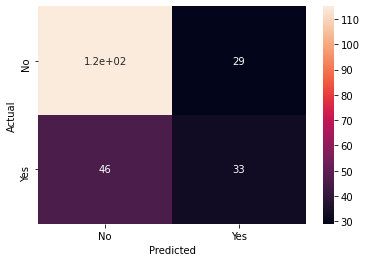

In [7]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [8]:
from sklearn.metrics import classification_report

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.71      0.80      0.75       144
         Yes       0.53      0.42      0.47        79

    accuracy                           0.66       223
   macro avg       0.62      0.61      0.61       223
weighted avg       0.65      0.66      0.65       223



Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :

-Taux de vrais positifs
-Taux de faux positifs
Le taux de vrais positifs (TVP) est l'équivalent du rappel. Il est donc défini comme suit :
TVP=VP+(VP/FN)
Le taux de faux positifs (TFP) est défini comme suit :
TFP=FP+(FP+VN)
Une courbe ROC trace les valeurs TVP et TFP pour différents seuils de classification. Diminuer la valeur du seuil de classification permet de classer plus d'éléments comme positifs, ce qui augmente le nombre de faux positifs et de vrais positifs. 

AUC signifie "aire sous la courbe ROC". Cette valeur mesure l'intégralité de l'aire à deux dimensions située sous l'ensemble de la courbe ROC (par calculs d'intégrales) de (0,0) à (1,1).
L'AUC fournit une mesure agrégée des performances pour tous les seuils de classification possibles. On peut interpréter l'AUC comme une mesure de la probabilité pour que le modèle classe un exemple positif aléatoire au-dessus d'un exemple négatif aléatoire.